# Домашнее задание "Случайные марковские процессы"

Скачайте текст войны и мир (ссылка на github и гугл диск). Очистите его, оставив только русские буквы и символы пробела. Постройте матрицу переходных вероятностей.

In [6]:
# Библиотеки

import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set()

In [13]:
# Загружаем книгу

with open('tom_1.txt', 'r') as f:
    text_1 = f.read().lower()
    
with open('tom_2.txt', 'r') as f:
    text_2 = f.read().lower()

with open('tom_3.txt', 'r') as f:
    text_3 = f.read().lower()

with open('tom_4.txt', 'r') as f:
    text_4 = f.read().lower()

text = text_1 + text_2 + text_3 + text_4


In [14]:
# Очищаем
text = re.sub('[^а-я\s]','', text)

In [16]:
text = re.sub('[\n]',' ', text)

In [18]:
text = re.sub('[\s]+',' ', text)

In [26]:
RUSSIAN = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя '
POS = {l: i for i, l in enumerate(RUSSIAN)}

In [27]:
# Делаем матрицу переходных вероятностей

probabilities = np.zeros((len(RUSSIAN), len(RUSSIAN)))

In [28]:
for cp, cn in zip(text[:-1], text[1:]):
    probabilities[POS[cp], POS[cn]] += 1

In [38]:
probabilities = (probabilities / probabilities.sum(axis=1)[:, None])

<ipython-input-38-dc1e1f362eff>:1: RuntimeWarning: invalid value encountered in true_divide
  probabilities = (probabilities / probabilities.sum(axis=1)[:, None])


Посчитайте вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р

In [60]:
start = POS['п']
end = POS['р']
prior = 1. / len(RUSSIAN)
for c1 in RUSSIAN:
    for c2 in RUSSIAN:
        if c1 != ' ' and c2 != ' ':
            proba = prior * probabilities[start, POS[c1]] * probabilities[POS[c1], POS[c2]] * probabilities[POS[c2], end] * probabilities[end, POS[' ']]
            if proba > 0:
                print(''.join(['п', c1, c2, 'р']), proba)

паар 2.5642173934253434e-10
пабр 3.4713798907471876e-08
павр 3.954315236617169e-08
пагр 4.3966796469760655e-08
падр 1.0115292055962128e-07
паер 6.727463269766857e-08
пажр 2.5307857239564085e-10
пазр 4.1813501718749896e-08
паир 7.822733413875512e-10
пайр 8.249387919310934e-10
пакр 1.663673531721892e-07
памр 3.471644813062523e-09
панр 3.860161700688574e-09
паор 3.040384551201885e-10
папр 1.8952402497760835e-07
парр 9.05377611050778e-10
паср 1.7311848859801682e-08
патр 1.9130851200402329e-07
паур 2.314597014404742e-09
пафр 1.0951578030425606e-07
пахр 8.322888782479809e-09
пачр 8.7813338419475e-10
пашр 1.8222762416489114e-10
пащр 1.5746526561647887e-10
паэр 2.9471121546781316e-12
паюр 5.512416986890957e-09
паяр 4.814645831340327e-09
пгар 9.414062767327548e-10
пгвр 1.500382767874127e-11
пггр 1.871374933184894e-12
пгдр 1.7745833277612421e-09
пгер 1.1556512576335265e-09
пгжр 7.639047126958962e-15
пгзр 3.7250413261935125e-13
пгир 1.537216429197236e-10
пгкр 9.916078188334633e-11
пгмр 1.77278232

Используя матрицу переходных вероятностей сгенерируйте слово, начинающееся с буквы “Б” и имеющее длину 8-мь символов

In [63]:
s = []
while True:
    start = np.random.choice(list(RUSSIAN))
    if start != " ":
        break
    
s.append(start)
length = 7
for i in range(length):
    index = POS[s[i]]
    while True:
        next_char = np.random.choice(list(RUSSIAN), p=probabilities[index])
        if next_char != ' ':
            break
            
    s.append(next_char)

print (''.join(s))

кобогойс


Выберите ряд из предыдущих домашних заданий по временным рядам и оцените его через HMM. Попробуйте “построить” (через среднее каждой компоненты) наивный прогноз ряда.

In [42]:
# Функция анализа ряда

def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [43]:
# Фунция визуализации ряда и коррелограммы

def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

In [64]:
series = pd.read_csv("Series/monthly-sales-of-company-x-jan-6.csv")['Count']

Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


/Users/vandal/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


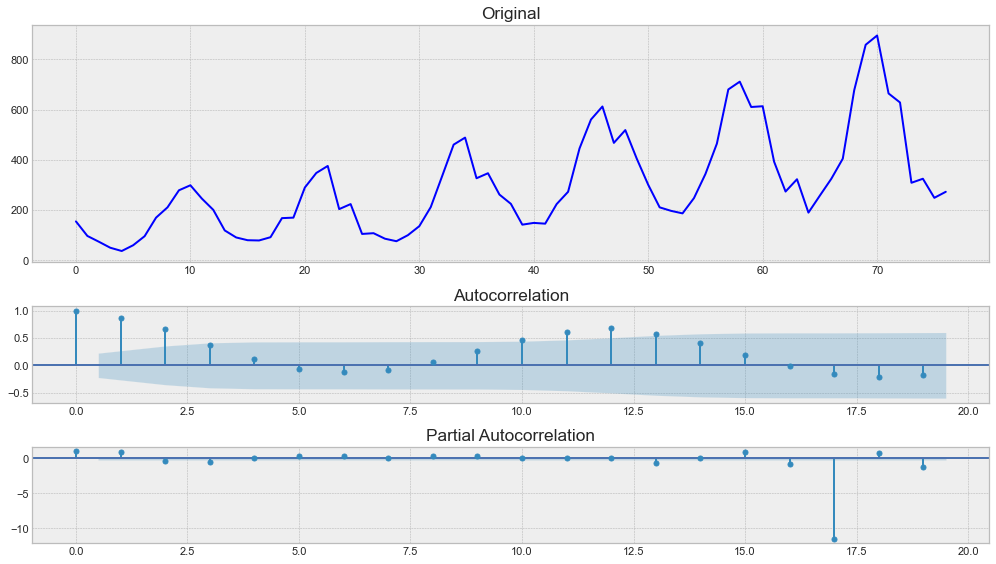

In [65]:
tsplot(series)

Ряд нестационарный. Приведем его к стационарному виду

In [47]:
series = boxcox(series, 0)

In [48]:
series = series[1:] - series[:-1]

In [49]:
series = series[12:] - series[:-12]

In [50]:
series = series[1:] - series[:-1]

Results of Dickey-Fuller Test:
Test Statistic                 -5.290390
p-value                         0.000006
#Lags Used                      9.000000
Number of Observations Used    53.000000
Critical Value (1%)            -3.560242
Critical Value (5%)            -2.917850
Critical Value (10%)           -2.596796
dtype: float64


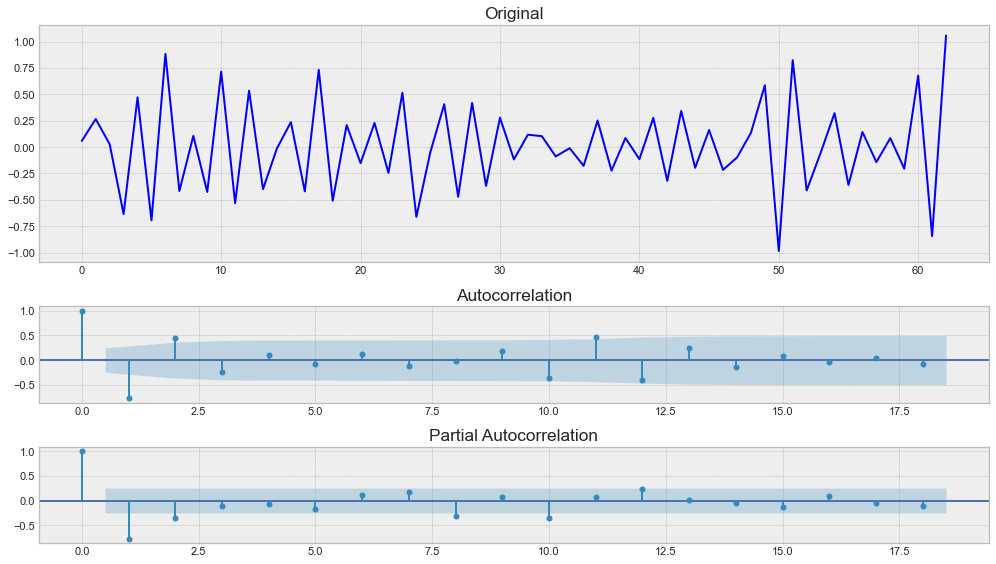

In [51]:
tsplot(series)

Сделали его стационарным

In [52]:
from hmmlearn.hmm import GaussianHMM

In [54]:
values = series.reshape(-1,1)

In [55]:
for n in range(1, 14):
    model = GaussianHMM(n_components=n,
                        covariance_type="diag",
                        n_iter=1000)
    model.fit(values)


Fitting a model with 79 free scalar parameters with only 63 data points will result in a degenerate solution.
Fitting a model with 98 free scalar parameters with only 63 data points will result in a degenerate solution.
Fitting a model with 119 free scalar parameters with only 63 data points will result in a degenerate solution.
Fitting a model with 142 free scalar parameters with only 63 data points will result in a degenerate solution.
Fitting a model with 167 free scalar parameters with only 63 data points will result in a degenerate solution.
Fitting a model with 194 free scalar parameters with only 63 data points will result in a degenerate solution.


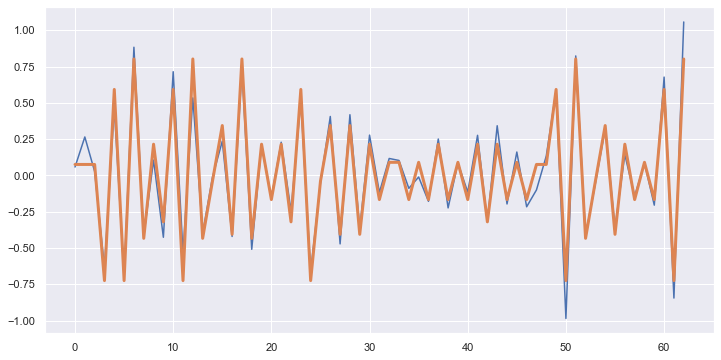

In [56]:
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]
    
plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means, linewidth=3)